In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2
from implementations import *

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

## Cleaning of data and visualisation

(array([  9.99130000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.78920000e+04,   7.94340000e+04,
          2.58000000e+03,   1.74000000e+02,   6.00000000e+00,
          1.00000000e+00]),
 array([ -999.    ,  -787.0427,  -575.0854,  -363.1281,  -151.1708,
           60.7865,   272.7438,   484.7011,   696.6584,   908.6157,
         1120.573 ]),
 <a list of 10 Patch objects>)

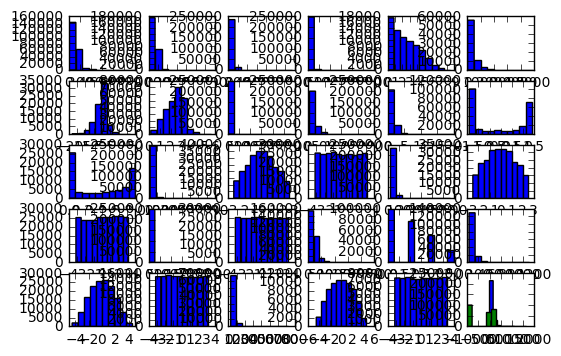

In [15]:
#visualisation
num_plot = np.shape(tX)[1] 
f,a = plt.subplots(5,6)
a = a.ravel()
for i,ax in enumerate(a):
    column = tX[:,i]
    clean = column[np.where(column != -999)]
    ax.hist(clean)

#f.savefig('test.png',dpi=400,bbox_inches = 'tight')

(array([  9.99130000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.78920000e+04,   7.94340000e+04,
          2.58000000e+03,   1.74000000e+02,   6.00000000e+00,
          1.00000000e+00]),
 array([ -999.    ,  -787.0427,  -575.0854,  -363.1281,  -151.1708,
           60.7865,   272.7438,   484.7011,   696.6584,   908.6157,
         1120.573 ]),
 <a list of 10 Patch objects>)

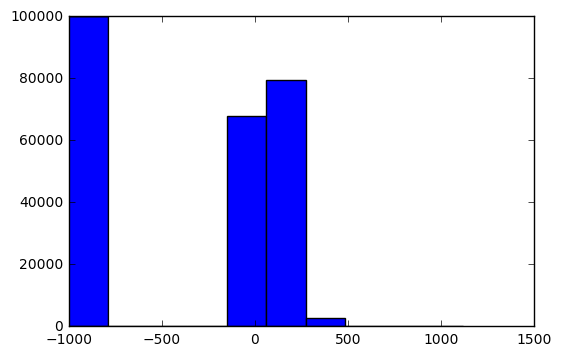

In [16]:
plt.hist(tX[:,23])

In [3]:
#Clean data

#a = np.array([[3.0,8.0,5.0,-999.0,1.0],[7.0,4.0,1.0,3.0,8.0]])

#remove -999 to the mean of the colum
for column in tX.T:
    clean = column[np.where(column != -999)]
    mean = np.mean(clean)
    column[np.where(column == -999)] = mean
    
standard_data = standardize(tX)
tX_clean = standard_data[0]
means = standard_data[1]
variances = standard_data[2]


In [110]:
var_to_remove = np.where(variances>0.8)
print(var_to_remove)
print(np.shape(var_to_remove))
#tX_clean = tX_clean[:,13:]
#print(np.shape(tX_clean))

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)
(1, 28)


In [72]:
degree = 3
a = np.array([2,3])
c = build_poly2(tX_clean,degree)
print(np.shape(c))

(250000, 310)


In [21]:
a = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
print(a)
b = a[:,1:]
print(b)

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [4]:
#split data
ratio = 0.8
#60% train, 20%test, 20%cross

#test_x = np.array([1,2,3,4,5,6,7,8,9,10])
#test_y = np.array([1,1,1,1,1,-1,1,-1,-1,-1])
#x_train, x_test, y_train,y_test  = split_data(test_y,test_x,ratio)

x_train, x_test, y_train,y_test = split_data(y,tX_clean,ratio)


/Users/Mick/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


## Test of the different methods

In [21]:
#*********************** least squares *******************#
#mse,weight = least_squares(y,tX)
mse_train,weight = least_squares(y_train,x_train)
mse_test = compute_loss(y_test,x_test,weight)
print("mse train",mse_train)
print("mse test",mse_test)

mse train 0.390274194423
mse test 0.388536456197


In [22]:
y_pred = predict_labels(weight, x_test)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print(np.shape(y_correct))
print(np.shape(y_test))
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])


[-1. -1.  1. ..., -1. -1. -1.]
[-1. -1. -1. ..., -1. -1. -1.]
[ 1.  1. -1. ...,  1.  1.  1.]
(1, 36015)
(50000,)
Correct pourcentage predition = 0.7203


In [6]:
#******************** gradient descent *******************#
w_initial = np.zeros([tX.shape[1]])
max_iters = 500
gamma = 0.08
mse,weight = least_squares_GD(y_train,x_train,w_initial,max_iters,gamma)
print(mse)
print(weight)

0.431557975106
[ -1.56872990e-02  -1.77467339e-01  -2.23129267e-02   5.28241154e-02
   7.38142343e-02   6.05938350e-03  -5.58950539e-02   6.99799884e-02
  -6.89922633e-02   2.20582638e-02  -1.44904682e-01   2.73373001e-01
   1.76367922e-02   1.87879070e-01  -7.71996721e-04  -3.67153246e-03
   1.37182515e-01  -1.51167199e-03   2.35028825e-03   1.02035705e-02
   7.07541588e-03   1.33374917e-02   5.61119888e-02   6.09354768e-02
  -3.41629615e-05   4.74992022e-04  -5.15019289e-03   2.53748782e-03
   4.27539944e-04   1.39640152e-02]


In [7]:
#************** stochastic gradient descent ****************#
w_initial = np.zeros([x_train.shape[1]])
batch_size = 32
max_iters = 1000
gamma = 0.01
mse_SGD,weight_SGD = least_squares_SGD(y_train,x_train,w_initial,batch_size,max_iters,gamma)
print(mse_SGD)
print(weight)

0.41435125529
[ -1.56872990e-02  -1.77467339e-01  -2.23129267e-02   5.28241154e-02
   7.38142343e-02   6.05938350e-03  -5.58950539e-02   6.99799884e-02
  -6.89922633e-02   2.20582638e-02  -1.44904682e-01   2.73373001e-01
   1.76367922e-02   1.87879070e-01  -7.71996721e-04  -3.67153246e-03
   1.37182515e-01  -1.51167199e-03   2.35028825e-03   1.02035705e-02
   7.07541588e-03   1.33374917e-02   5.61119888e-02   6.09354768e-02
  -3.41629615e-05   4.74992022e-04  -5.15019289e-03   2.53748782e-03
   4.27539944e-04   1.39640152e-02]


# ridge regression

degree:  1
1 --> 0.340136371375  AND  0.340265601146
degree:  2
2 --> 0.314622686345  AND  0.314935421647
degree:  3
3 --> 0.304221783524  AND  0.304919683216
degree:  4
4 --> 0.299041614434  AND  0.300842451168
degree:  5
5 --> 0.296549089539  AND  0.389535576357


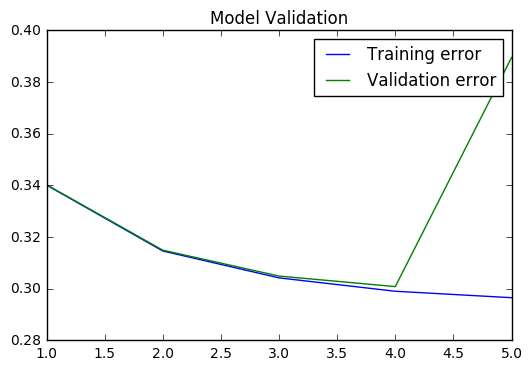

In [78]:
#model validation

degrees = range(1,6)
k_fold = 4
lambda_ = 0.01
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for degree in degrees:
    print("degree: ",degree)
    
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]

        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,degree)
        x_cv_poly = build_poly(x_cv,degree)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lambda_)
        mse_cv = compute_loss(y_cv,x_cv_poly,w)
        
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
    print(degree,'-->',np.mean(train_mse),' AND ', np.mean(cv_mse))
    
p = plt.plot(degrees,mean_train_mse,degrees,mean_cv_mse)
plt.title("Model Validation") 
plt.legend(p, ["Training error","Validation error"])
plt.show()


In [5]:
#lambda validation

lambdas = np.logspace(-3, -1, 10)
k_fold = 4
degree = 3
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for lamb in lambdas:
    print("lambda: ",lamb)
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]
    
        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,degree)
        x_cv_poly = build_poly(x_cv,degree)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lamb)
        mse_cv = compute_loss(y_cv,x_cv_poly,w)
        
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
    print(lamb,'-->',np.mean(train_mse),' AND ', np.mean(cv_mse))
        
    
p=plt.semilogx(lambdas,mean_train_mse,lambdas,mean_cv_mse)
plt.title("Lambda validation") 
plt.legend(p, ["Training error","Validation error"])
plt.xlabel('Lambdas')
plt.ylabel('mse')
plt.show()


lambda:  0.0001
0.0001 --> 0.298514262898  AND  340.721025447
lambda:  0.000316227766017
0.000316227766017 --> 0.298519072704  AND  348.637671234
lambda:  0.001


KeyboardInterrupt: 

In [14]:
#************** logistic regression ****************#
max_iters = 1
gamma = 0.000001
lambda_ = 0.016
mse,weight = reg_logistic_regression(y_test, x_test, lambda_, gamma, max_iters)
print(mse)
print(weight)

iteration:  0  Test accuracy:  0.47904  Loss :  0.497815041756
[0.4978150417560358]
[array([-0.04151525,  0.00262941, -0.04030489,  0.01773837,  0.04889918,
        0.00797091, -0.04238355, -0.00549941, -0.02886223,  0.0242896 ,
        0.00695057, -0.03946645,  0.0114673 ,  0.00512824, -0.02835869,
       -0.00866736, -0.03441473, -0.00543211,  0.02706349, -0.04122815,
       -0.0346376 , -0.00588219, -0.00194977,  0.01525662, -0.04859504,
       -0.00440709, -0.0293567 , -0.02709289,  0.03793297,  0.04623623]), array([-0.04151524,  0.0026294 , -0.04030489,  0.01773837,  0.04889934,
        0.00797091, -0.04238362, -0.0054994 , -0.02886223,  0.02428961,
        0.00695036, -0.03946623,  0.01146793,  0.00512825, -0.0283587 ,
       -0.00866736, -0.03441473, -0.00543211,  0.0270635 , -0.04122815,
       -0.03463759, -0.00588218, -0.00194963,  0.01525662, -0.04859503,
       -0.00440709, -0.0293567 , -0.02709288,  0.03793296,  0.04623623])]


In [81]:
#best parameters

#With all columns + ones
degree = 3
lambda_ = 0.0464158883361
#predict 38991

#with build poly 2 best lambda mse 0.30188506517
#degree = 4
#lambda_ = 0.001
#predict: 39510 

#with columns without 1 to 13 + ones
#degree = 2
#lambda_ = 0.003
x_train_poly = build_poly(x_train,degree)
x_test_poly = build_poly(x_test,degree)

mse_train,weight = ridge_regression(y_train,x_train_poly, lambda_)
mse_test = compute_loss(y_test,x_test_poly,weight)
print("mse train",mse_train)
print("mse test",mse_test)

y_pred = predict_labels(weight, x_test_poly)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print(np.shape(y_correct))
print(np.shape(y_test))
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])



mse train 0.307673631949
mse test 24.6064908185
(1, 38991)
(50000,)
Correct pourcentage predition = 0.77982


## Test of methods

In [87]:
#calculate pourcentage of prediction
best_degree = 3
lambda_ = 0.0464158883361

x_train_poly = build_poly(tX_clean,best_degree)

mse_train,weights = ridge_regression(y,x_train_poly, lambda_)
print(np.shape(weights))
print(mse_train)

(465,)
0.298656625959


## Generate predictions and save ouput in csv format for submission:

In [85]:
DATA_TEST_PATH = '../data/test.csv' # download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [88]:
for column in tX_test.T:
    clean = column[np.where(column != -999)]
    mean = np.mean(clean)
    column[np.where(column == -999)] = mean
    
standard_test_data = standardize(tX_test)
tX_test_clean = standard_test_data[0]
print(np.shape(tX_test_clean))
tX_test_clean_poly = build_poly2(tX_test_clean,best_degree)
print(np.shape(tX_test_clean_poly))

(568238, 31)
(568238, 465)


In [89]:
OUTPUT_PATH = '../submission5.csv' #  fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_clean_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)